### This notebook explores the calendar of Munich listings to answer the question: 
## What is the best time to visit Munich if you want to save money for accomodation?

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [24]:
LOCATION = 'munich'

df_list = pd.read_csv(LOCATION + '/listings.csv.gz')
df_reviews = pd.read_csv(LOCATION + '/reviews.csv.gz')
df_cal = pd.read_csv(LOCATION + '/calendar.csv.gz')

df_list_sum = pd.read_csv(LOCATION + '/listings.csv')
df_reviews_sum = pd.read_csv(LOCATION + '/reviews.csv')
df_neib_sum = pd.read_csv(LOCATION + '/neighbourhoods.csv')

In [25]:
pd.options.display.max_rows=10
pd.options.display.max_columns=None
pd.options.display.max_colwidth=30

## Calendar

#### First look into to data and types for each column:

In [26]:
df_cal

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,710604,2021-03-23,t,$39.00,$39.00,1.0,1125.0
1,710604,2021-03-24,t,$39.00,$39.00,1.0,1125.0
2,710604,2021-03-25,t,$39.00,$39.00,1.0,1125.0
3,710604,2021-03-26,t,$39.00,$39.00,1.0,1125.0
4,710604,2021-03-27,t,$39.00,$39.00,1.0,1125.0
...,...,...,...,...,...,...,...
1849111,48673500,2022-03-18,f,$40.00,$40.00,25.0,1125.0
1849112,48673500,2022-03-19,f,$40.00,$40.00,25.0,1125.0
1849113,48673500,2022-03-20,f,$40.00,$40.00,25.0,1125.0
1849114,48673500,2022-03-21,f,$40.00,$40.00,25.0,1125.0


In [27]:
df_cal.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

#### Some data types are wrong. In order to be able to work with the data, we need to change some datatypes.

First convert **date** to *datetime* type:

In [28]:
df_cal['date'] = pd.to_datetime(df_cal['date'])

Prices need to converted to *float* in order to be able to work with it.

In [29]:
df_cal['price']=df_cal['price'].replace(to_replace='[\$,]', value='', regex=True).astype(float)
df_cal['adjusted_price']=df_cal['adjusted_price'].replace(to_replace='[\$,]', value='', regex=True).astype(float)

To be able to have a close look at prices, let's introduce the **day_of_week** column.

In [30]:
df_cal['day_of_week'] = df_cal['date'].dt.dayofweek

This is how it looks now:

In [31]:
df_cal

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day_of_week
0,710604,2021-03-23,t,39.0,39.0,1.0,1125.0,1
1,710604,2021-03-24,t,39.0,39.0,1.0,1125.0,2
2,710604,2021-03-25,t,39.0,39.0,1.0,1125.0,3
3,710604,2021-03-26,t,39.0,39.0,1.0,1125.0,4
4,710604,2021-03-27,t,39.0,39.0,1.0,1125.0,5
...,...,...,...,...,...,...,...,...
1849111,48673500,2022-03-18,f,40.0,40.0,25.0,1125.0,4
1849112,48673500,2022-03-19,f,40.0,40.0,25.0,1125.0,5
1849113,48673500,2022-03-20,f,40.0,40.0,25.0,1125.0,6
1849114,48673500,2022-03-21,f,40.0,40.0,25.0,1125.0,0


And this are the corrected data types:

In [32]:
df_cal.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price           float64
minimum_nights           float64
maximum_nights           float64
day_of_week                int64
dtype: object

## First question to be answered is, what is the price distribution over the year:

Let's calculate the mean price over all listings for each day of the year:

First check if we have *NULL* values in the data frame.

In [33]:
df_cal.isnull().sum()

listing_id          0
date                0
available           0
price             340
adjusted_price    340
minimum_nights     26
maximum_nights     26
day_of_week         0
dtype: int64

*NULL* values have impact to the average (even if very small due to the small number of missing values), let's drop all rows with *NULL* **price**.

In [34]:
df_cal.dropna(subset=['price'], inplace=True)

Now let's group all listings by **date** and calculate the average **price** of all listings for each day:

In [35]:
mean_price = df_cal[['date', 'price']].groupby(by='date').mean().reset_index()

In [36]:
mean_price

,date,price
0,2021-03-22,87.617737
1,2021-03-23,121.844113
2,2021-03-24,121.669695
3,2021-03-25,121.947311
4,2021-03-26,125.078125
...,...,...
372,2022-03-29,117.050151
373,2022-03-30,118.258106
374,2022-03-31,120.142157
375,2022-04-01,80.798122


And plot the result:

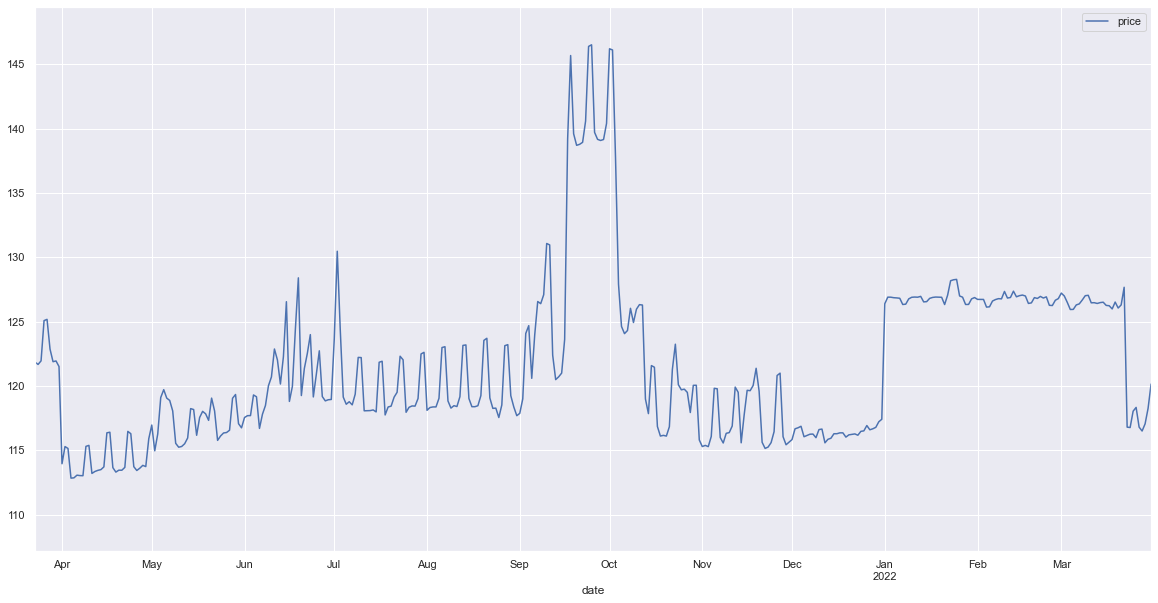

In [37]:
scale_from = mean_price['price'][1:-2].min()*0.95
scale_to = mean_price['price'][1:-2].max()*1.02

mean_price.set_index('date')[1:-2].plot(kind='line', y='price', figsize=(20,10), grid=True).set_ylim(scale_from, scale_to);

## There are two interesting observations:
### 1. There is a peak in the second half of September: **"Welcome to the Octoberfest!**"
### 2. The price apparently depends on the day of week. Let's have a closer look at it.

## Second question: What is the price distribution within a week?

Let's group the prices for each day of week and get the average price:

In [38]:
mean_price_dow = df_cal[['day_of_week', 'price']].groupby(by='day_of_week').mean().reset_index()

In [39]:
mean_price_dow

,day_of_week,price
0,0,120.688993
1,1,121.052007
2,2,120.667118
3,3,120.849175
4,4,123.175604
5,5,123.493037
6,6,120.839011


It's difficult to interpret index-based day of week. Let's convert it to strings from Monday to Sunday:

In [40]:
def convert_day_of_week(day_idx):
    '''
    This function convert index based day of week to string
    0 - Monday
    6 - Sunday
    
    if the day_idx oís out of this range, this index will be returned
    '''    
    
    if(day_idx>6 or day_idx<0):
        return day_idx
    
    lst = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return lst[day_idx]

In [41]:
mean_price_dow['day_of_week'] = mean_price_dow['day_of_week'].apply(convert_day_of_week)

In [42]:
mean_price_dow

,day_of_week,price
0,Monday,120.688993
1,Tuesday,121.052007
2,Wednesday,120.667118
3,Thursday,120.849175
4,Friday,123.175604
5,Saturday,123.493037
6,Sunday,120.839011


In [43]:
mean_price_dow['top'] = mean_price_dow['price']>123

Now we can plot the result:

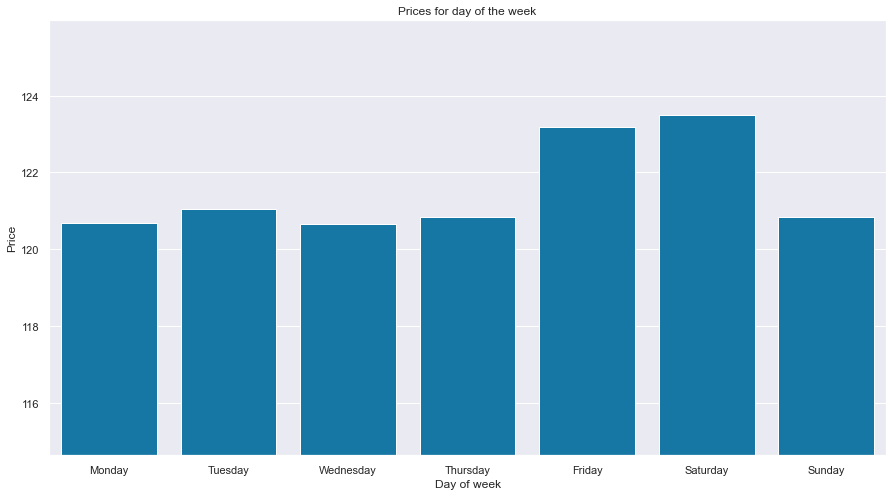

In [44]:
scale_from = mean_price_dow['price'].min()*0.95
scale_to = mean_price_dow['price'].max()*1.02

sns.set(rc={'figure.figsize':(15,8)})
fig = sns.barplot(data=mean_price_dow, x='day_of_week', y='price', color='#0080bb');
fig.set_ylim(scale_from, scale_to);
fig.set_title('Prices for day of the week');
fig.set_xlabel('Day of week');
fig.set_ylabel('Price');

## No surprise, the most expensive days are Saturday and Friday. The weekend can start!